In [37]:
import numpy as np
import gc

In [38]:
a = []
b = [1,2,3]
c = [4,5,6]

a.append(b)
a.append(c)

del b
del c
gc.collect()



print(a)
print(b)
print(c)

[[1, 2, 3], [4, 5, 6]]


NameError: name 'b' is not defined

In [26]:
# create an empty 3D array with 2 layers, 3 rows and 4 columns
arr = np.empty((2, 3, 4))

# print the array
print(arr)

[[[4.6430201e-310 0.0000000e+000 0.0000000e+000 0.0000000e+000]
  [0.0000000e+000 0.0000000e+000 0.0000000e+000 0.0000000e+000]
  [0.0000000e+000 0.0000000e+000 0.0000000e+000 0.0000000e+000]]

 [[0.0000000e+000 0.0000000e+000 0.0000000e+000 0.0000000e+000]
  [0.0000000e+000 0.0000000e+000 0.0000000e+000 0.0000000e+000]
  [0.0000000e+000 0.0000000e+000 0.0000000e+000 0.0000000e+000]]]


In [23]:
#na = np.array([[1, 2, 3]], dtype=np.float64)
na = np.array()

#na = np.append(na, [[4, 5, 6]], axis=0)


na

array([[1., 2., 3.],
       [4., 5., 6.]])

# LSTM Issue

In [2]:
!pip install tensorflow_datasets

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 9.4 MB/s eta 0:00:0000:0100:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.8/153.8 KB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.1/140.1 KB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 KB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.3/52.3 KB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 223.0/223.0 KB 7.6 MB/s eta 0:00:00
  Created wheel for promise: filename=promise-2.3-py3-none-any.whl size=21502 sha256=dac38e196b6476557dae525f7532c11db525b75983575fd817cd18850cae3bde
  Stored in directory: /home/vscode/.cache/pip/wheels/29/93/c6/762e359f8cb6a5b69c72235d798804cae523bbe41c2aa8333d
Successfully built promise
You should consider upgrading via the '/usr/local/bin/python -m pip install --upgrade pip' command

In [3]:
from __future__ import absolute_import, division, print_function, unicode_literals
import os
import tensorflow_datasets as tfds
import tensorflow as tf
from tensorflow.python.client import device_lib

dataset, info = tfds.load('imdb_reviews/subwords8k', with_info=True,
                          as_supervised=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

BUFFER_SIZE = 10000
BATCH_SIZE = 64

train_dataset = train_dataset.shuffle(BUFFER_SIZE)
train_dataset = train_dataset.padded_batch(BATCH_SIZE, train_dataset.output_shapes)

test_dataset = test_dataset.padded_batch(BATCH_SIZE, test_dataset.output_shapes)
encoder = info.features['text'].encoder


model = tf.keras.Sequential([
    tf.keras.layers.Embedding(encoder.vocab_size, 64),
    #tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])
history = model.fit(train_dataset, epochs=10,
                    validation_data=test_dataset, 
                    validation_steps=30)

2023-02-26 11:19:29.645389: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-26 11:19:30.143385: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-02-26 11:19:30.143425: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory
2023-02-26 11:19:30.143430: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nv

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/25000 [00:00<?, ? examples/s]

Shuffling /home/vscode/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incomplete3ROV63/imdb_reviews-train.t…

Generating test examples...:   0%|          | 0/25000 [00:00<?, ? examples/s]

Shuffling /home/vscode/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incomplete3ROV63/imdb_reviews-test.tf…

Generating unsupervised examples...:   0%|          | 0/50000 [00:00<?, ? examples/s]

Shuffling /home/vscode/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incomplete3ROV63/imdb_reviews-unsuper…

2023-02-26 11:21:03.877577: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-26 11:21:03.889048: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-26 11:21:03.889199: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-26 11:21:03.889578: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorF

Dataset imdb_reviews downloaded and prepared to /home/vscode/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0. Subsequent calls will reuse this data.


e NUMA node, so returning NUMA node zero
2023-02-26 11:21:03.890106: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-26 11:21:03.890207: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-26 11:21:04.184550: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-26 11:21:04.184684: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-26 11:21:04.184782:

AttributeError: 'ShuffleDataset' object has no attribute 'output_shapes'

## Coordinate Heatmap

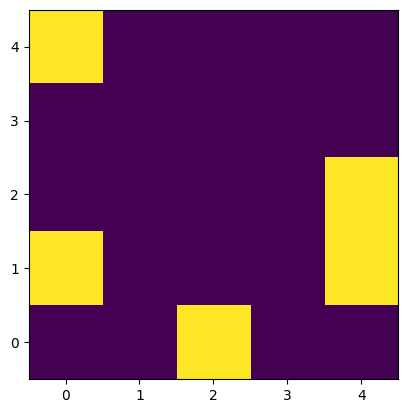

In [39]:
import numpy as np
import matplotlib.pyplot as plt

def create_heatmap(screen_coor_x, screen_coor_y):
    # Determine the size of the heatmap
    max_x = int(np.ceil(max(screen_coor_x)))
    max_y = int(np.ceil(max(screen_coor_y)))

    # Create a 2D histogram of the coordinates
    heatmap, xedges, yedges = np.histogram2d(screen_coor_y, screen_coor_x, bins=(max_y, max_x))

    # Create the heatmap image and display it
    plt.imshow(heatmap.T, origin='lower')
    plt.show()



# Example usage
session_1_screen_coor_x = [1.2, 2.4, 3.1, 4.5, 2.2]
session_1_screen_coor_y = [3.5, 1.7, 4.8, 2.1, 5.0]

create_heatmap(session_1_screen_coor_x, session_1_screen_coor_y)

In [40]:
import pandas as pd

# load the source training set
df_source = pd.read_csv('data/train.csv.gz', compression='gzip', index_col=1)

print(df_source.shape)
with pd.option_context('display.max_columns', None):
    display(df_source.head(3))

(13174211, 19)


,session_id,elapsed_time,event_name,name,level,page,room_coor_x,room_coor_y,screen_coor_x,screen_coor_y,hover_duration,text,fqid,room_fqid,text_fqid,fullscreen,hq,music,level_group
index,,,,,,,,,,,,,,,,,,,
0,20090312431273200,0,cutscene_click,basic,0,NaN,-413.991405,-159.314686,380.0,494.0,NaN,undefined,intro,tunic.historicalsociety.closet,tunic.historicalsociety.closet.intro,NaN,NaN,NaN,0-4
1,20090312431273200,1323,person_click,basic,0,NaN,-413.991405,-159.314686,380.0,494.0,NaN,"Whatcha doing over there, Jo?",gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,NaN,NaN,NaN,0-4
2,20090312431273200,831,person_click,basic,0,NaN,-413.991405,-159.314686,380.0,494.0,NaN,Just talking to Teddy.,gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,NaN,NaN,NaN,0-4


In [85]:
def get_session_screen_coor(data: df_source, session_id: int):
    # get the session data
    session_data = df_source[df_source['session_id'] == session_id]
    session_data = session_data[['screen_coor_x', 'screen_coor_y']]
    session_data = session_data.dropna()

    # get the screen coordinates
    screen_coor_x = session_data['screen_coor_x'].values
    screen_coor_y = session_data['screen_coor_y'].values
    
    return screen_coor_x, screen_coor_y

In [94]:
session_1_screen_coor_x, session_1_screen_coor_y =  \
    get_session_screen_coor(df_source, 20090312431273200)

In [95]:
session_2_screen_coor_x, session_2_screen_coor_y =  \
    get_session_screen_coor(df_source, 21040510125933256)

In [101]:
#20090312433251036
#22100221145014656

# this one has a bigger max x value
session_3_screen_coor_x, session_3_screen_coor_y =  \
    get_session_screen_coor(df_source, 22100221145014656)

In [102]:
import numpy as np
import matplotlib.pyplot as plt

def create_heatmap(screen_coor_x, screen_coor_y):
    # Determine the size of the heatmap
    max_x = int(np.ceil(max(screen_coor_x)))
    max_y = int(np.ceil(max(screen_coor_y)))

    # Create a 2D histogram of the coordinates
    heatmap, xedges, yedges = np.histogram2d(screen_coor_y, screen_coor_x, bins=50)

    # Create the heatmap image and display it
    # plt.imshow(heatmap.T, origin='lower')
    # plt.show()


    extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
    plt.imshow(heatmap.T, cmap='hot', extent=extent, origin='lower')

# Example usage
#create_heatmap(screen_coor_x, screen_coor_y)

In [103]:
def create_heatmap(screen_coor_x, screen_coor_y):
    """
    Make the points stand out more by applying a logarithmic transformation
    """
    # Create the 2D histogram
    heatmap, xedges, yedges = np.histogram2d(screen_coor_y, screen_coor_x, bins=50)

    # Apply logarithmic transformation
    heatmap = np.log(heatmap + 1)

    # Plot the heatmap
    extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
    plt.imshow(heatmap.T, cmap='hot', extent=extent, origin='lower')
    plt.axis('off')
    plt.show()

    return heatmap

#create_heatmap(screen_coor_x, screen_coor_y)

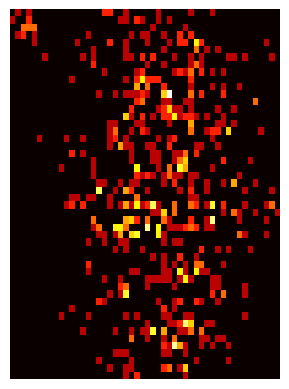

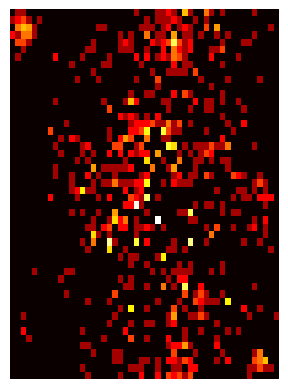

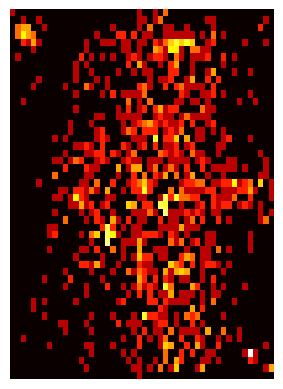

In [104]:
session_1_heatmap = create_heatmap(session_1_screen_coor_x, session_1_screen_coor_y)
session_2_heatmap = create_heatmap(session_2_screen_coor_x, session_2_screen_coor_y)
session_3_heatmap = create_heatmap(session_3_screen_coor_x, session_3_screen_coor_y)

In [105]:
print(session_1_heatmap.shape)
print(session_2_heatmap.shape)
print(session_3_heatmap.shape)

(50, 50)
(50, 50)
(50, 50)


In [106]:
max_x = np.max(session_1_screen_coor_x)
df_source[df_source['screen_coor_x'] > max_x]

,session_id,elapsed_time,event_name,name,level,page,room_coor_x,room_coor_y,screen_coor_x,screen_coor_y,hover_duration,text,fqid,room_fqid,text_fqid,fullscreen,hq,music,level_group
index,,,,,,,,,,,,,,,,,,,
105,20090312433251036,166156,navigate_click,undefined,3,NaN,-121.973808,-95.000000,875.0,425.0,NaN,NaN,NaN,tunic.kohlcenter.halloffame,NaN,NaN,NaN,NaN,0-4
106,20090312433251036,167438,navigate_click,undefined,3,NaN,10.268994,-95.000000,875.0,425.0,NaN,NaN,NaN,tunic.kohlcenter.halloffame,NaN,NaN,NaN,NaN,0-4
107,20090312433251036,168888,navigate_click,undefined,3,NaN,358.817547,-95.000000,875.0,425.0,NaN,NaN,NaN,tunic.kohlcenter.halloffame,NaN,NaN,NaN,NaN,0-4
108,20090312433251036,169488,navigate_click,undefined,3,NaN,485.287887,-95.000000,875.0,425.0,NaN,NaN,NaN,tunic.kohlcenter.halloffame,NaN,NaN,NaN,NaN,0-4
246,20090312433251036,427125,navigate_click,undefined,7,NaN,958.020604,6.315246,878.0,319.0,NaN,NaN,tomap,tunic.historicalsociety.entry,NaN,NaN,NaN,NaN,5-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1016,22100215460321130,2098252,navigate_click,undefined,22,NaN,863.673354,10.500386,923.0,340.0,NaN,NaN,tomap,tunic.historicalsociety.entry,NaN,NaN,NaN,NaN,13-22
1017,22100215460321130,2098952,navigate_click,undefined,22,NaN,929.339825,14.317263,924.0,341.0,NaN,NaN,tomap,tunic.historicalsociety.entry,NaN,NaN,NaN,NaN,13-22
323,22100217104993650,582735,navigate_click,undefined,7,NaN,886.331860,32.154158,878.0,305.0,NaN,NaN,tomap,tunic.historicalsociety.entry,NaN,NaN,NaN,NaN,5-12


In [107]:
# import numpy as np
# import matplotlib.pyplot as plt

# def create_heatmap(screen_coor_x, screen_coor_y):
#     # Determine the size of the heatmap
#     max_x = int(np.ceil(max(screen_coor_x)))
#     max_y = int(np.ceil(max(screen_coor_y)))

#     # Create a 2D histogram of the coordinates
#     heatmap, xedges, yedges = np.histogram2d(screen_coor_y, screen_coor_x, bins=50)

#     # Create the heatmap image and display it
#     # plt.imshow(heatmap.T, origin='lower')
#     # plt.show()


#     extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
#     plt.imshow(heatmap.T, cmap='hot', extent=extent, origin='lower')

# # Example usage
# create_heatmap(screen_coor_x, screen_coor_y)